In [1]:
%pylab inline
plt.style.use("default")
from mpl_toolkits.axes_grid1 import make_axes_locatable

Populating the interactive namespace from numpy and matplotlib


In [2]:
n_roi, n_odour = 148, 48
X = randn(n_roi, n_odour)
A = X.T @ X

In [3]:
R1 = qr(randn(24,24))[0]
U1 = eye(48); U1[:24,:24] = R1

In [4]:
R2 = qr(randn(12,12))[0]
U2 = eye(48); U2[:12,:12] = R2

In [5]:
A1 = U1 @ A @ U1.T
A2 = U2 @ A1 @ U2.T

In [6]:
S = [arange(48), arange(24), arange(12)]
J = [[]] + [setdiff1d(S[i-1],S[i]) for i in range(1,3)]

In [7]:
def resi(H, S):
    SL = S[-1]
    F = sum(H**2)
    F -= sum(H[SL][:,SL]**2)
    F -= diag(H**2).sum()
    F += diag(H[SL][:,SL]**2).sum()
    return F

def offdiag(H):
    return sum(H**2) - diag(H**2).sum()

In [8]:
E1 = offdiag(A1[J[1]][:,J[1]]) + 2 * sum(A1[J[1]][:,S[1]]**2)
E2 = offdiag(A2[J[2]][:,J[2]]) + 2 * sum(A2[J[2]][:,S[2]]**2)
assert allclose(E1 + E2,resi(A2,S))

In [9]:
N = 12
S = [arange(N), arange(N-1), arange(N-2)]; S = [list(s) for s in S]
J = [[]] + [setdiff1d(S[i-1],S[i]) for i in range(1,3)]

In [10]:
X = randn(4*N, N)
A = X.T @ X
I1 = S[0][-2:]
I2 = S[1][-2:]
U1 = eye(N); O1 = qr(randn(2,2))[0]; U1[np.ix_(I1,I1)] = O1
U2 = eye(N); O2 = qr(randn(2,2))[0]; U2[np.ix_(I2,I2)] = O2;
x = randn(U1.shape[0]); print(allclose(norm(U1 @ x)**2, norm(x)**2))
x = randn(U2.shape[0]); print(allclose(norm(U2 @ x)**2, norm(x)**2))
A1 = U1 @ A  @ U1.T
A2 = U2 @ A1 @ U2.T

True
True


In [11]:
E1 = 0*offdiag(A1[J[1]][:,J[1]]) + 2 * sum(A1[J[1]][:,S[1]]**2)
E2 = 0*offdiag(A2[J[2]][:,J[2]]) + 2 * sum(A2[J[2]][:,S[2]]**2)
assert allclose(E1 + E2,resi(A2,S))

In [12]:
S11 = [i for i in S[1] if i not in I1]
I11 = [i for i in I1   if i in   S[1]]

In [13]:
E1_0 = 2*sum(A1[J[1]][:,S[1]]**2)
E1_1 = 2*sum(A1[J[1]][:, I11]**2)
E1_2 = 2*sum(A1[J[1]][:, S11]**2)

In [14]:
print(E1, E1_0, E1_1, E1_2)

635.5347150363915 635.5347150363915 26.51287497270336 609.0218400636882


In [15]:
k1 = I1[-1]
E11 = 2 * sum((O1 @ A[I1][:,I1] @ O1.T)[-1,:-1]**2)
print(E11)
allclose(E11, E1_1)

26.51287497270336


True

In [16]:
2*((O1 @ A[I1][:,I1] @ A[I1][:,I1].T @ O1.T)[-1,-1] - (O1 @ A[I1][:,I1] @ O1.T)[-1,-1]**2)

26.51287497270323

In [17]:
B = A[I1][:, S11]
B = B @ B.T
E12 = 2* (O1 @ B @ O1.T)[-1,-1]
allclose(E12, E1_2)

True

In [19]:
B1 = A[:, S[1]] @ A[:, S[1]].T
E11 = 2*sum((U1 @ A @ U1.T)[:-1,-1]**2)
allclose(E11, E1)
#E11 += 2 * (U1 @ B1 @ U1.T)[-1,-1]

True

# Apply this to real data

In [20]:
# Load mdlCs from file
import pickle
with open("mdlCs.pkl", "rb") as f:
    mdlCs = pickle.load(f)

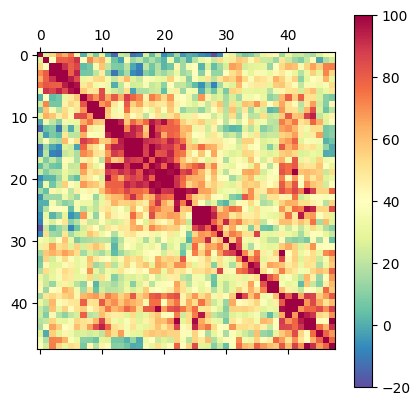

In [23]:
from scipy.cluster.hierarchy import linkage, leaves_list
C = mdlCs["Free"]
which_order = "Cstar"
CC = C[which_order]
link = linkage(CC, method = 'average')
leaf_order = leaves_list(link)
CC = CC[leaf_order][:,leaf_order]
matshow(CC, vmin=-20,vmax=100, cmap=cm.Spectral_r); colorbar()


In [24]:
from importlib import reload
import mmf;

<module 'mmf' from '/nemo/lab/schaefera/working/tootoos/git/glom-io-transform/analyses/connectivity2/mmf.py'>

In [25]:
reload(mmf)
U,Sl,Al, removed, kept = mmf.MMF(CC, 47, 2)

Level 1: best_El=2868.78 best_inds=[16, 15]


Level 2: best_El=3454.18 best_inds=[21, 19]


Level 3: best_El=3547.98 best_inds=[37, 38]


Level 4: best_El=3538.48 best_inds=[12, 13]


Level 5: best_El=3648.91 best_inds=[34, 33]


Level 6: best_El=3875.85 best_inds=[17, 20]


Level 7: best_El=4365.97 best_inds=[3, 2]


Level 8: best_El=4430.94 best_inds=[37, 36]


Level 9: best_El=4648.90 best_inds=[43, 44]


Level 10: best_El=4554.09 best_inds=[11, 21]


Level 11: best_El=4789.33 best_inds=[24, 22]


Level 12: best_El=5193.29 best_inds=[18, 11]


Level 13: best_El=5062.48 best_inds=[34, 35]


Level 14: best_El=4457.57 best_inds=[45, 41]


Level 15: best_El=5293.14 best_inds=[17, 23]


Level 16: best_El=5125.95 best_inds=[27, 26]


Level 17: best_El=5897.76 best_inds=[5, 6]


Level 18: best_El=6080.26 best_inds=[30, 29]


Level 19: best_El=6155.17 best_inds=[46, 47]


Level 20: best_El=6185.87 best_inds=[40, 39]


Level 21: best_El=5947.90 best_inds=[9, 10]


Level 22: best_El=6054.56 best_inds=[45, 24]


Level 23: best_El=6229.94 best_inds=[3, 0]


Level 24: best_El=6034.94 best_inds=[16, 14]


Level 25: best_El=6316.64 best_inds=[31, 32]


Level 26: best_El=6795.08 best_inds=[12, 16]


Level 27: best_El=6757.31 best_inds=[28, 27]


Level 28: best_El=6920.92 best_inds=[42, 43]


Level 29: best_El=5601.20 best_inds=[8, 7]


Level 30: best_El=7014.95 best_inds=[5, 4]


Level 31: best_El=8921.52 best_inds=[17, 18]


Level 32: best_El=8917.67 best_inds=[37, 34]


Level 33: best_El=8763.62 best_inds=[5, 1]


Level 34: best_El=9116.99 best_inds=[45, 40]


Level 35: best_El=10159.78 best_inds=[30, 31]


Level 36: best_El=10466.09 best_inds=[28, 25]


Level 37: best_El=10086.35 best_inds=[9, 8]
Level 38: best_El=11936.14 best_inds=[30, 37]


Level 39: best_El=15795.91 best_inds=[28, 9]
Level 40: best_El=13726.95 best_inds=[28, 45]


Level 41: best_El=15095.74 best_inds=[46, 42]


Level 42: best_El=15815.20 best_inds=[46, 30]


Level 43: best_El=51140.10 best_inds=[28, 5]
Level 44: best_El=41204.54 best_inds=[17, 3]


Level 45: best_El=25271.12 best_inds=[12, 46]
Level 46: best_El=83.94 best_inds=[12, 28]
Level 47: best_El=0.00 best_inds=[17, 12]


In [31]:
import matplotlib.colors as colors

In [32]:
cnorm = colors.TwoSlopeNorm(vmin=-20, vcenter=0, vmax=100)

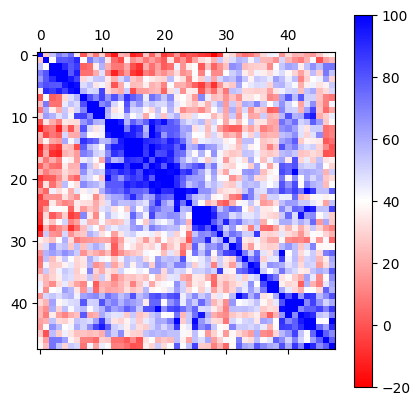

In [38]:
matshow(CC, cmap=cm.bwr_r, vmin=-20,vmax=100); colorbar()

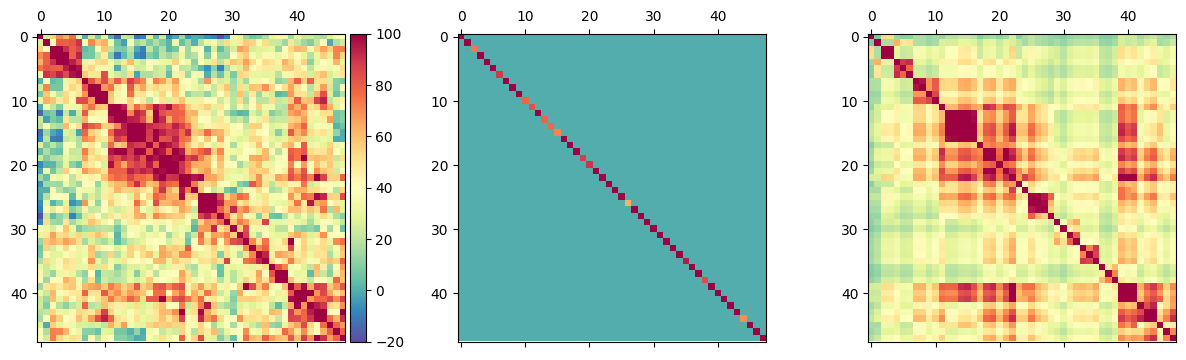

In [40]:
Arec, Urec, H = mmf.rec(Al, U, Sl, 47)
figure(figsize=(15,4))
subplot(133); im3 = matshow(Arec, cmap=cm.Spectral_r, vmin=-20,vmax=100, fignum=False);
subplot(132); matshow(H,          cmap=cm.Spectral_r, vmin=-20,vmax=100, fignum=False); 
subplot(131); matshow(CC,         cmap=cm.Spectral_r, vmin=-20,vmax=100, fignum=False);
divider = make_axes_locatable(gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
colorbar(im3, cax=cax)

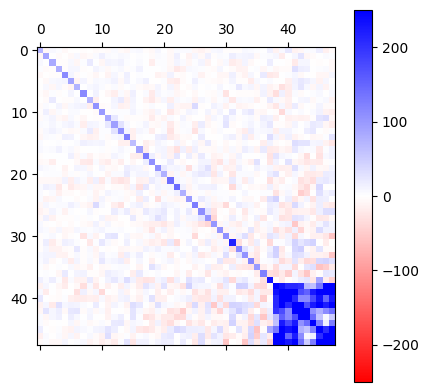

In [27]:
ii = -10
link = linkage(Al[ii], method = 'average')
#leaf_order = leaves_list(link)
leaf_order = arange(Al[ii].shape[0])
leaf_order = removed + kept
AA = Al[ii][leaf_order][:,leaf_order]
matshow(AA, cmap=cm.bwr_r, vmin=-250,vmax=250); colorbar()

In [28]:
UU = [U[0]]
for ii in range(1, len(U)):
    UU.append(U[ii] @ UU[-1])

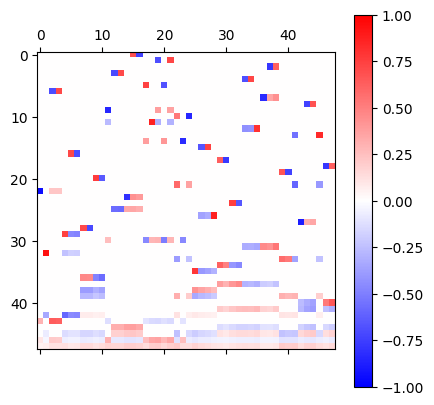

In [29]:
matshow(UU[-1][leaf_order], cmap=cm.bwr, vmin=-1,vmax=1); colorbar()

In [30]:
import baseline_mmf as bmmf
reload(bmmf)
N = CC.shape[0]
L = 47
B = bmmf.Baseline_MMF(N, L, N - L )
bmmf.torch.manual_seed(0)
A_rec, A_, right, D, mother_coef, father_coef, mother_wave, father_wave =  B.forward(bmmf.torch.from_numpy(CC).float())

Selected indices 1:  44 39


O: tensor([[ 0.7214,  0.6925],
        [-0.6925,  0.7214]])
Selected indices 2:  28 26
O: tensor([[ 0.7711,  0.6367],
        [-0.6367,  0.7711]])
Selected indices 3:  37 34
O: tensor([[ 0.7672,  0.6415],
        [-0.6415,  0.7672]])
Selected indices 4:  31 25
O: tensor([[ 0.7850,  0.6196],
        [-0.6196,  0.7850]])
Selected indices 5:  33 23
O: tensor([[ 0.7283,  0.6852],
        [-0.6852,  0.7283]])
Selected indices 6:  36 34
O: tensor([[ 0.8422,  0.5392],
        [-0.5392,  0.8422]])
Selected indices 7:  29 27
O: tensor([[ 0.7636,  0.6457],
        [-0.6457,  0.7636]])
Selected indices 8:  16 15
O: tensor([[ 0.7285,  0.6850],
        [-0.6850,  0.7285]])
Selected indices 9:  42 40
O: tensor([[ 0.7621,  0.6475],
        [-0.6475,  0.7621]])
Selected indices 10:  5 4
O: tensor([[ 0.7483,  0.6634],
        [-0.6634,  0.7483]])
Selected indices 11:  2 3
O: tensor([[ 0.7108,  0.7034],
        [-0.7034,  0.7108]])
Selected indices 12:  6 4
O: tensor([[ 0.8311,  0.5562],
        [-0.556

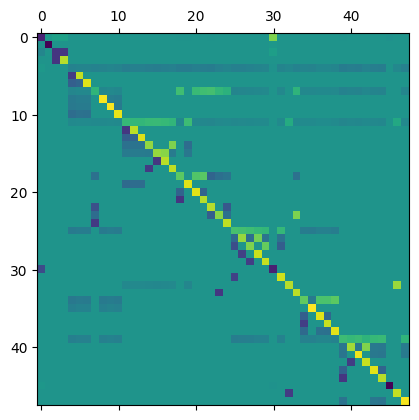

In [175]:
matshow(right)

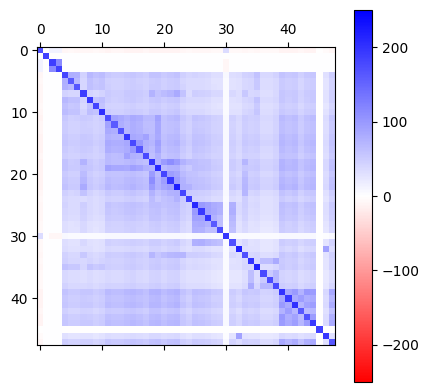

In [176]:
matshow(A_rec.detach().numpy(), cmap=cm.bwr_r, vmin=-250,vmax=250); colorbar()